### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2

### Reading Image

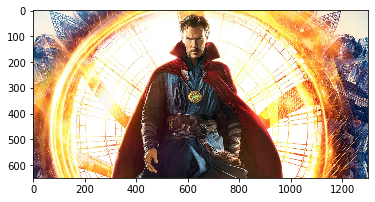

In [4]:
img = cv2.imread('doctor-strange.jpeg')    #Reading Image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  #Changing the color map from BGR to RGB
plt.imshow(img)
plt.show()

In [31]:
img_size = img.shape
print(img.shape)
print(img)

(650, 1300, 3)
[[[236 236 228]
  [235 235 227]
  [234 234 226]
  ...
  [230 231 223]
  [229 230 222]
  [228 229 221]]

 [[235 235 227]
  [235 235 227]
  [233 233 225]
  ...
  [229 230 222]
  [229 230 222]
  [228 229 221]]

 [[235 235 227]
  [234 234 226]
  [233 233 225]
  ...
  [228 229 221]
  [228 229 221]
  [228 229 221]]

 ...

 [[ 51  45  79]
  [ 52  45  79]
  [ 62  46  85]
  ...
  [135 154 171]
  [169 180 186]
  [177 183 183]]

 [[ 49  43  77]
  [ 46  39  73]
  [ 55  39  78]
  ...
  [112 134 157]
  [161 175 186]
  [176 187 191]]

 [[ 49  43  77]
  [ 45  38  72]
  [ 55  39  78]
  ...
  [ 94 120 145]
  [145 161 174]
  [160 173 179]]]


In [6]:
reshaped_img = img.reshape((-1,3))    # Flatenning the img array 
print(reshaped_img.shape)

(845000, 3)


### Applying K-Means Algorithm

In [7]:
from sklearn.cluster import KMeans

In [109]:
k = 2

kmeans = KMeans(n_clusters=k)
#kmeans.fit?

In [110]:
kmeans.fit(reshaped_img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [111]:
centers = kmeans.cluster_centers_
centers = np.array(centers,dtype='uint8')
print(centers)

[[ 87  53  49]
 [246 226 183]]


In [104]:
kmeans.predict(reshaped_img)

array([2, 2, 2, ..., 1, 1, 0], dtype=int32)

In [105]:
new_img4 = centers[kmeans.predict(reshaped_img)]

In [106]:
print(new_img4)

[[251 249 236]
 [251 249 236]
 [251 249 236]
 ...
 [125  95  98]
 [125  95  98]
 [245 217 130]]


In [107]:
new_img4 = new_img4.reshape((img_size))
print(new_img)

[[[251 247 228]
  [251 247 228]
  [251 247 228]
  ...
  [251 247 228]
  [251 247 228]
  [251 247 228]]

 [[251 247 228]
  [251 247 228]
  [251 247 228]
  ...
  [251 247 228]
  [251 247 228]
  [251 247 228]]

 [[251 247 228]
  [251 247 228]
  [251 247 228]
  ...
  [251 247 228]
  [251 247 228]
  [251 247 228]]

 ...

 [[ 72  44  45]
  [ 72  44  45]
  [ 72  44  45]
  ...
  [228 171  97]
  [228 171  97]
  [228 171  97]]

 [[ 72  44  45]
  [ 72  44  45]
  [ 72  44  45]
  ...
  [228 171  97]
  [228 171  97]
  [251 247 228]]

 [[ 72  44  45]
  [ 72  44  45]
  [ 72  44  45]
  ...
  [ 72  44  45]
  [228 171  97]
  [228 171  97]]]


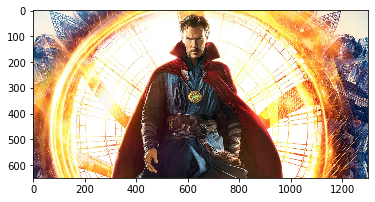

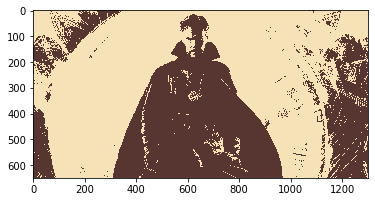

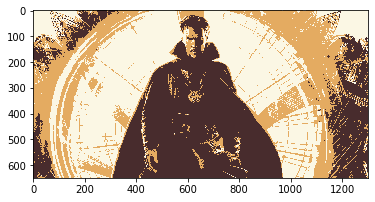

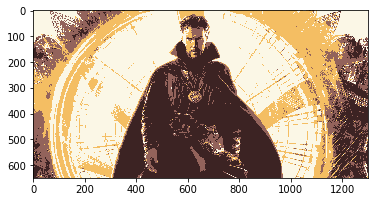

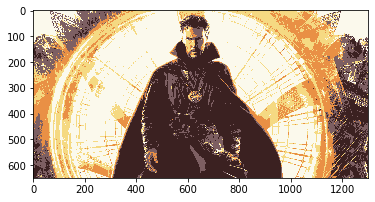

In [122]:
plt.imshow(img)
plt.show()
plt.imshow(new_img1) #for k = 2
plt.show()
plt.imshow(new_img2) #for k = 3
plt.show()
plt.imshow(new_img3) #for k = 4
plt.show()
plt.imshow(new_img4) #for k = 5
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


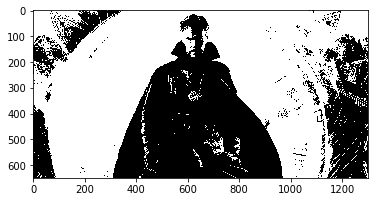

In [129]:
cut_img = np.zeros((new_img1.shape))
for i in range(new_img1.shape[0]):
    for j in range(0,1300):
        if new_img1[i][j][0] == centers[1][0] and new_img1[i][j][1] == centers[1][1] and new_img1[i][j][2] == centers[1][2]:
            cut_img[i][j][0] = new_img1[i][j][0]
            cut_img[i][j][1] = new_img1[i][j][1]
            cut_img[i][j][2] = new_img1[i][j][2]
       
        

            

plt.imshow(cut_img)
plt.show()